## Black Friday Dataset EDA and Feature Engineering

### Cleaning and Preparing for model creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

# Problem statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
## importing Train dataset
train_df = pd.read_csv("Black Friday/train.csv")
train_df.columns, train_df.shape

(Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3', 'Purchase'],
       dtype='object'),
 (550068, 12))

In [3]:
## importing test dataset
test_df = pd.read_csv("Black Friday/test.csv")
test_df.columns, test_df.shape

(Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3'],
       dtype='object'),
 (233599, 11))

In [4]:
#df = train_df.append(test_df)
df = pd.concat([train_df,test_df],axis=0)
df.shape

(783667, 12)

In [5]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
## Droping User_ID column which is not required
df.drop(columns='User_ID',inplace=True)

In [8]:
## Droping  Product_ID column
df.drop(labels='Product_ID', axis=1, inplace=True)

In [9]:
df['Gender'].value_counts() 

M    590031
F    193636
Name: Gender, dtype: int64

In [10]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [11]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
##pd.get_dummies(data=df.Age,drop_first=True)

In [13]:
## Fixing Categorical column Age
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df.City_Category.value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [15]:
# Fixing Categorical column City_Category

df_city=pd.get_dummies(data=df['City_Category'],drop_first=True,prefix='City_Ctg')

In [16]:
df_city.head(5)

,City_Ctg_B,City_Ctg_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
df = pd.concat([df,df_city],axis=1)

In [18]:
## Droping  City_Category column
df.drop(columns=['City_Category'],axis=1,inplace=True)

In [19]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Ctg_B,City_Ctg_C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [20]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [21]:
## Fixing Categorical variable Stay_in current city
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\use\AppData\Local\Temp\ipykernel_12092\3019824294.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [22]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Ctg_B,City_Ctg_C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,NaN,NaN,NaN,1,0
233595,0,3,15,4,1,5,8.0,NaN,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,NaN,NaN,0,1


In [23]:
## Missing Vlaues

df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City_Ctg_B                         0
City_Ctg_C                         0
dtype: int64

In [24]:
df.Product_Category_2.describe()

count    537685.000000
mean          9.844506
std           5.089093
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [25]:
df.Product_Category_2.value_counts(dropna=False)

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [26]:
df.Product_Category_2.mode()[0]

8.0

In [27]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df.Product_Category_2.mode()[0])

In [28]:
df['Product_Category_2'].isnull().sum()

0

In [29]:
df.Product_Category_3.isnull().sum()

545809

In [30]:
df.Product_Category_3.value_counts(dropna=False)

NaN     545809
16.0     46469
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

In [31]:
## Replacing missing values

In [32]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df.Product_Category_3.mode()[0])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   City_Ctg_B                  783667 non-null  uint8  
 10  City_Ctg_C                  783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


##### Here Stay_In_Current_City_Years column is Object but we have Integer values so will convert into int64

In [34]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   City_Ctg_B                  783667 non-null  uint8  
 10  City_Ctg_C                  783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(2)
memory usage: 58.3 MB


#### Convert uint8 to int

In [35]:
df['City_Ctg_B'] = df['City_Ctg_B'].astype(int)
df['City_Ctg_C'] = df['City_Ctg_C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   City_Ctg_B                  783667 non-null  int32  
 10  City_Ctg_C                  783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


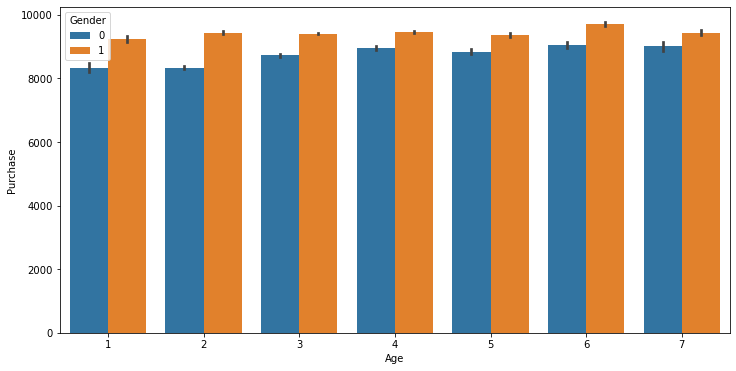

In [36]:
## Visualization 1

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)
plt.show()

All age groups purchase is almost same.

In all age groups purchase men as more purchase then female

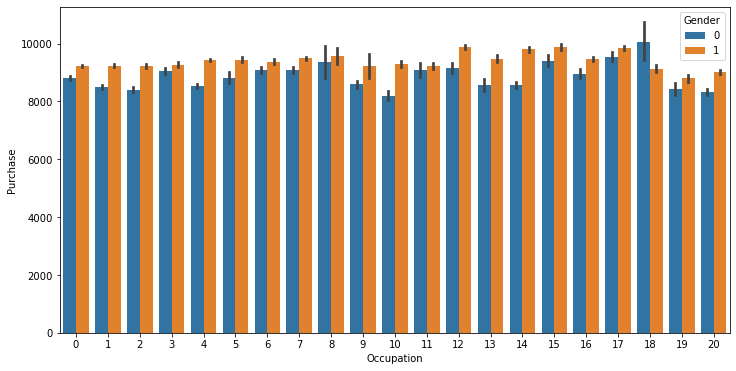

In [37]:
## Visualization 2

sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
plt.show()

Occupation is also uniform. 

Occupation does not effect the purchase much

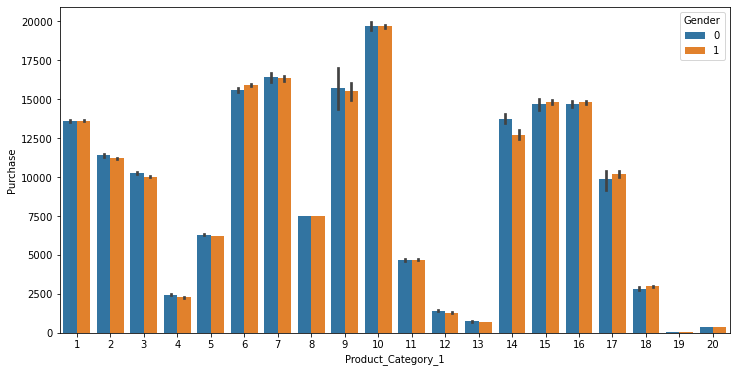

In [38]:
## Visualization 3

sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)
plt.show()

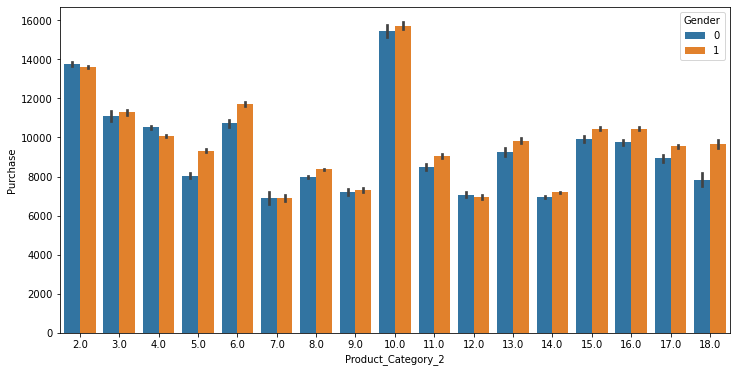

In [39]:
## Visualization 4

sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)
plt.show()

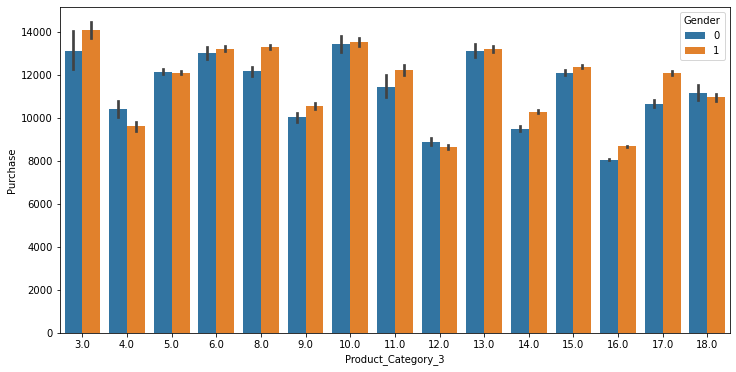

In [40]:
## Visualization 5

sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)
plt.show()

In [ ]:
## Separating Train and test records 

In [41]:
df_train = df[~df['Purchase'].isnull()]
df_test = df[df['Purchase'].isnull()]

X=df_train.loc[:,df.columns != 'Purchase']
y=df_train['Purchase']

In [42]:
df_train.shape, X.shape, y.shape

((550068, 11), (550068, 10), (550068,))

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((412551, 10), (137517, 10), (412551,), (137517,))

In [45]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
stdscaler.fit_transform(X_train)
stdscaler.transform(X_test)

array([[ 0.57194355, -0.36731589,  1.82955248, ...,  0.36892722,
        -0.85167687, -0.67203975],
       [-1.74842429,  0.37197328, -1.23755684, ...,  0.36892722,
        -0.85167687, -0.67203975],
       [-1.74842429,  1.11126245, -1.08420137, ..., -1.45446292,
         1.17415423, -0.67203975],
       ...,
       [ 0.57194355, -0.36731589,  1.36948608, ...,  0.36892722,
         1.17415423, -0.67203975],
       [ 0.57194355, -0.36731589, -1.23755684, ...,  0.00424919,
         1.17415423, -0.67203975],
       [ 0.57194355, -0.36731589,  0.90941969, ..., -1.08978489,
         1.17415423, -0.67203975]])

In [46]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Ctg_B,City_Ctg_C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,1
